## QUESTION 1 ##

I have downloaded the AMAZON stock and ZOOM stock. The timeframe is daily (for both stocks from 18/2/2020 to 12/2/2021).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

amzn_dataframe = pd.read_excel('AMZN2.xlsx',header=0,index_col=0,usecols=[0,4])

amzn_dataframe.rename(columns={"Close":"Amazon Close Price"}) 
zoom_dataframe = pd.read_excel('ZM2.xlsx',header=0,index_col=0,usecols=[0,4])
zoom_dataframe.rename(columns={"Close":"ZOOM Close Price"}) 

A = np.array(amzn_dataframe)
Z = np.array(zoom_dataframe)


### Calculating returns. ###

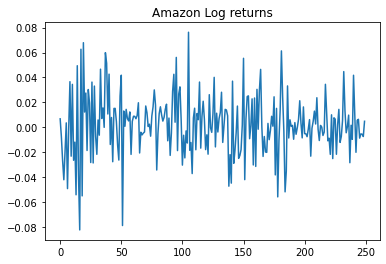

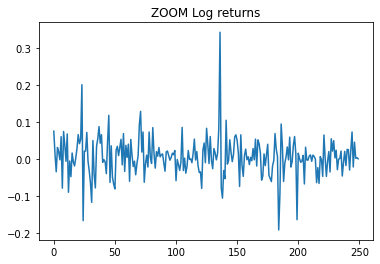

In [2]:
A_logr = np.diff(np.log(A),axis=0)
Z_logr = np.diff(np.log(Z),axis=0)


plt.plot(A_logr)
plt.title('Amazon Log returns')
plt.show()

plt.plot(Z_logr)
plt.title('ZOOM Log returns')
plt.show()

### Calculating mean , standard deviation, skewness, and excess kurtosis of both stocks' log returns. ###

In [3]:
print ('Mean of Amazon returns is: '+ str (np.mean(A_logr)))
print ('Mean of ZOOM returns is: '+ str (np.mean(Z_logr)))

Mean of Amazon returns is: 0.0016761738080302386
Mean of ZOOM returns is: 0.006010357005020967


In [4]:
print ('STD of Amazon returns is: '+ str (np.std(A_logr)))
print ('STD of ZOOM returns is: '+ str (np.std(Z_logr)))

STD of Amazon returns is: 0.02423993543046224
STD of ZOOM returns is: 0.05210911936174498


In [5]:
#I changed the type of data from numpy array to dataframe again to calculate the skewness and kurtosis.
A_logr=pd.DataFrame(A_logr)
print ('Skewness of Amazon returns is: ' + str(A_logr[0].skew()))
Z_logr=pd.DataFrame(Z_logr)
print ('Skewness of ZOOM returns is: ' + str(Z_logr[0].skew()))

Skewness of Amazon returns is: -0.042441869064914865
Skewness of ZOOM returns is: 0.7644367946638057


In [6]:
print ('Kurtosis of Amazon returns is: ' + str(A_logr[0].kurt()))
print ('Kurtosis of ZOOM returns is: ' + str(Z_logr[0].kurt()))

Kurtosis of Amazon returns is: 1.0543263828650562
Kurtosis of ZOOM returns is: 7.922584727234613


### Calculating their covariance and correlation. ###

In [7]:
print ('The covariance between these two stocks is: ' + str(A_logr[0].cov(Z_logr[0])))
print ('The correlation between these two stocks is: ' + str(A_logr[0].corr(Z_logr[0])))

The covariance between these two stocks is: 0.0003082866174331383
The correlation between these two stocks is: 0.2430909655960849


We notice that there is a small positive correlation between Amazon and ZOOM stock during that time.

Covariance measures how the two variables change together ( towards the same direction if positive, and inversely if negative). The value of the covariance shows the "proportionality" of this change. Covariance does not show how one variable affects the other, just "describes" the way one variable moves in respect with the other.

On the other hand correlation measures, the strength of the relationship between those two variables. The degree with which one of them affects the other.

In our case we notice that since our cov is almost '0', the two stocks's log_returns dont really have any significant directional relationship.

But we notice that there is a small positive correlation (almost 0.243) between Amazon and ZOOM stock log_returns during that time. 

Which means that log_returns movements between these two stocks are not totally independent. Thus, for any given increase of the first variable's log_returns, will loosely (0.24) signify an increase of the other variable's log_returns and vice versa.

The formula that connects these two is:
$$Correlation = \frac{Cov(x,y)}{\sigma_{x} \cdot{} \sigma_{y}}$$

Thus once we calculate the covariance for instance, all we have to do to calculate the correlation,is to divide with the product of their respective indivicual standard deviations.

### QUESTION 2 ###
I will now separate both timeseries into two parts. The first part will consist of 80% of both series number of values (which is 200) and the other part will consist with the rest 20% ( which is 50) for a total of 250.

In [8]:
Amazon_1p=A_logr.iloc[:200,:1]
Amazon_2p=A_logr.iloc[200:251,:1]
Zoom_1p=Z_logr.iloc[:200,:1]
Zoom_2p=Z_logr.iloc[200:251,:1]

boolean_1p=Amazon_1p[0] >= 0 
boolean_1p=pd.DataFrame(boolean_1p)
boolean_1p.columns=['Amazon directions']
boolean_1p['Zoom directions']=Zoom_1p[0]>=0
boolean_1p['UU direction']= boolean_1p['Amazon directions'] & boolean_1p['Zoom directions']
boolean_1p['DD direction']= ~(boolean_1p['Amazon directions']) & ~(boolean_1p['Zoom directions'])
boolean_1p['UD direction']= boolean_1p['Amazon directions'] & ~(boolean_1p['Zoom directions'])
boolean_1p['DU direction']= ~(boolean_1p['Amazon directions']) & (boolean_1p['Zoom directions'])
boolean_1p.head(10)

,Amazon directions,Zoom directions,UU direction,DD direction,UD direction,DU direction
0,True,True,True,False,False,False
1,False,True,False,False,False,True
2,False,False,False,True,False,False
3,False,True,False,False,False,True
4,False,True,False,False,False,True
5,True,False,False,False,True,False
6,False,True,False,False,False,True
7,False,False,False,True,False,False
8,True,True,True,False,False,False
9,False,True,False,False,False,True


The boolean matrix above showcases the first 10 events, and assigns a 'True' value to the corresponding column. For example when both returns go up , We get a 'True' boolean value at UU direction. 

Similarly for the second part of the data:

In [9]:
boolean_2p=Amazon_2p[0] >= 0 
boolean_2p=pd.DataFrame(boolean_2p)
boolean_2p.columns=['Amazon directions']
boolean_2p['Zoom directions']=Zoom_2p[0]>=0
boolean_2p['UU direction']= boolean_2p['Amazon directions'] & boolean_2p['Zoom directions']
boolean_2p['DD direction']= ~(boolean_2p['Amazon directions']) & ~(boolean_2p['Zoom directions'])
boolean_2p['UD direction']= boolean_2p['Amazon directions'] & ~(boolean_2p['Zoom directions'])
boolean_2p['DU direction']= ~(boolean_2p['Amazon directions']) & (boolean_2p['Zoom directions'])
boolean_2p.head(10)

,Amazon directions,Zoom directions,UU direction,DD direction,UD direction,DU direction
200,False,True,False,False,False,True
201,False,True,False,False,False,True
202,False,False,False,True,False,False
203,False,False,False,True,False,False
204,True,True,True,False,False,False
205,False,False,False,True,False,False
206,False,True,False,False,False,True
207,True,False,False,False,True,False
208,True,False,False,False,True,False
209,True,True,True,False,False,False


### Calculating the transition matrix. ###

In [10]:
#I will extrapolate the path of the first part (200 values) and the second part (50 values).
path200a=boolean_1p['UU direction'].apply(lambda x: 'UU' if (x==True) else '' )
path200b=boolean_1p['DD direction'].apply(lambda x: 'DD' if (x==True) else '' )
path200c=boolean_1p['UD direction'].apply(lambda x: 'UD' if (x==True) else '' )
path200d=boolean_1p['DU direction'].apply(lambda x: 'DU' if (x==True) else '' )

path50a=boolean_2p['UU direction'].apply(lambda x: 'UU' if (x==True) else '' )
path50b=boolean_2p['DD direction'].apply(lambda x: 'DD' if (x==True) else '' )
path50c=boolean_2p['UD direction'].apply(lambda x: 'UD' if (x==True) else '' )
path50d=boolean_2p['DU direction'].apply(lambda x: 'DU' if (x==True) else '' )

In [11]:
eventpath200=path200a+path200b+path200c+path200d
eventpath50=path50a+path50b+path50c+path50d

In [12]:
#i will change the object type to list
eventpath200=list(eventpath200)
eventpath50=list(eventpath50)

In [13]:
#i create a function that counts the appearances of necessary events (in order to calculate the probabilities)
def eventcounter(a):
    countUUorDDtoUUorDD=0
    countUUorDDtoUDorDU=0
    countDUorUDtoUUorDD=0
    countUDorDUtoDUorDU=0
    for i in range(len(a)-1):
        if ((a[i] == 'UU' or a[i]=='DD') & (a[i+1] == 'UU' or a[i+1] =='DD')): 
            countUUorDDtoUUorDD+=1
        elif ((a[i] == 'UU' or a[i]=='DD') & (a[i+1] == 'UD' or a[i+1] =='DU')):
            countUUorDDtoUDorDU+=1
        elif ((a[i] == 'DU' or a[i]=='UD') & (a[i+1] == 'UU' or a[i+1] =='DD')):
            countDUorUDtoUUorDD+=1
        elif ((a[i] == 'UD' or a[i]=='DU') & (a[i+1] == 'UD' or a[i+1] =='DU')):
            countUDorDUtoDUorDU+=1
       
        
    return countUUorDDtoUUorDD , countUUorDDtoUDorDU ,countDUorUDtoUUorDD,countUDorDUtoDUorDU

In [14]:
#Gives out the number of occurences corresponding to all 4 transition types
eventcounter(eventpath200)

(82, 45, 44, 28)

We notice that this function counts all the transistions properly (they are one less that 200).
I will now calculate the transition probabilities, but first, i will count the number of 'UU' or 'DD' appearances in the matrix, and the number 'DU' or 'UD' appearances that lead to a transition.


In [15]:
def UUorDD(a):
    count=0
    for i in range(len(a)-1):
        if (a[i]== 'UU' or a[i]=='DD'):
            count+=1
    return count

def DUorUD(a):
    count=0
    for i in range(len(a)-1):
        if (a[i]== 'UD' or a[i]=='DU'):
            count+=1
    return count
print ('The number of appearances of UU or DD that result in a transition: ' + str(UUorDD(eventpath200)))
print ('The number of appearances of DU or UD that result in a transition: ' + str(DUorUD(eventpath200)))

The number of appearances of UU or DD that result in a transition: 127
The number of appearances of DU or UD that result in a transition: 72


In [16]:
#Thus the probability that the timeseries goes from UU or DD to UU or DD is:
print ('From UU or DD   TO   UU or DD, the probability IS : ' + str (round(100*eventcounter(eventpath200)[0]/(UUorDD(eventpath200)),2))+'%')

From UU or DD   TO   UU or DD, the probability IS : 64.57%


In [17]:
#Thus the probability that the timeseries goes from UU or DD to UD or DU is:
print ('From UU or DD   TO   UD or DU, the probability IS : ' + str (round(100*eventcounter(eventpath200)[1]/(UUorDD(eventpath200)),2))+'%')

From UU or DD   TO   UD or DU, the probability IS : 35.43%


In [18]:
#Thus the probability that the timeseries goes from DU or UD to DD or UU is:
print ('From DU or UD   TO   DD or UU, the probability IS : ' + str (round(100*eventcounter(eventpath200)[2]/(DUorUD(eventpath200)),2))+'%')

From DU or UD   TO   DD or UU, the probability IS : 61.11%


In [19]:
#Thus the probability that the timeseries goes from DU or UD to Du or UD is:
print ('From DU or UD   TO   DU or UD, the probability IS : ' + str (round(100*eventcounter(eventpath200)[3]/(DUorUD(eventpath200)),2))+'%')

From DU or UD   TO   DU or UD, the probability IS : 38.89%


Thus the first transition matrix  ( corresponding to the first 80% of the data) is:

In [20]:

transition_matrix200 = pd.DataFrame([[82/127, 45/127], [44/72, 28/72]])
transition_matrix200.columns = ['UU or DD','UD or DU']
transition_matrix200.index = ['UU or DD','UD or DU']
transition_matrix200

,UU or DD,UD or DU
UU or DD,0.645669,0.354331
UD or DU,0.611111,0.388889


Similarly i will now repeat the process to find the second matrix ( corresponding with the second part of the data).

In [21]:
eventcounter(eventpath50)

(22, 10, 11, 6)

In [22]:
print ('The number of appearances of UU or DD that result in a transition: ' + str(UUorDD(eventpath50)))
print ('The number of appearances of DU or UD that result in a transition: ' + str(DUorUD(eventpath50)))

The number of appearances of UU or DD that result in a transition: 32
The number of appearances of DU or UD that result in a transition: 17


In [23]:
#Thus the probability that the timeseries goes from UU or DD to UU or DD is:
print ('From UU or DD   TO   UU or DD, the probability IS : ' + str (round(100*eventcounter(eventpath50)[0]/(UUorDD(eventpath50)),2))+'%')

From UU or DD   TO   UU or DD, the probability IS : 68.75%


In [24]:
#Thus the probability that the timeseries goes from UU or DD to UD or DU is:
print ('From UU or DD   TO   UD or DU, the probability IS : ' + str (round(100*eventcounter(eventpath50)[1]/(UUorDD(eventpath50)),2))+'%')

From UU or DD   TO   UD or DU, the probability IS : 31.25%


In [25]:
#Thus the probability that the timeseries goes from DU or UD to DD or UU is:
print ('From DU or UD   TO   DD or UU, the probability IS : ' + str (round(100*eventcounter(eventpath50)[2]/(DUorUD(eventpath50)),2))+'%')

From DU or UD   TO   DD or UU, the probability IS : 64.71%


In [26]:
#Thus the probability that the timeseries goes from DU or UD to Du or UD is:
print ('From DU or UD   TO   DU or UD, the probability IS : ' + str (round(100*eventcounter(eventpath50)[3]/(DUorUD(eventpath50)),2))+'%')

From DU or UD   TO   DU or UD, the probability IS : 35.29%


In [27]:
transition_matrix50 = pd.DataFrame([[22/32, 10/32], [11/17, 6/17]])
transition_matrix50.columns = ['UU or DD','UD or DU']
transition_matrix50.index = ['UU or DD','UD or DU']
transition_matrix50

,UU or DD,UD or DU
UU or DD,0.687500,0.312500
UD or DU,0.647059,0.352941


### Comparison of the matrices. ###

We notice that both matrices have very similar transition probabilities. The probability to move from UU or DD to UU or DD is almost double than from UU or DD  to UD or Du, in both cases. Similarly we notice that the probability to move from UD or DU TO UU or DU is also double when compared to the probability of moving from UD or DU to UD or DU.

In both cases we cotice a strong linear dependence between the two vectors. I estimate both matrices must exhibit eigenvalues close to 0.



In [28]:
#The eigenvalues of the first matrix
print ('The first two eigenvalues are: '+ str(np.linalg.eig(transition_matrix200)[0]))

The first two eigenvalues are: [1.         0.03455818]


In [29]:
#The eigenvalues of the second matrix
print ('The first two eigenvalues are: '+ str(np.linalg.eig(transition_matrix50)[0]))

The first two eigenvalues are: [1.         0.04044118]


In [30]:
#I will now calculate both matrices to a high power, in order to see if their transition probabilities converge.
np.linalg.matrix_power(transition_matrix200,20)

array([[0.63298595, 0.36701405],
       [0.63298595, 0.36701405]])

In [31]:
#The first matrix converges (totally!). I will now raise the second matrix also to the 20th power and see if the probabilities 
#converge (exactly as the first one did).

np.linalg.matrix_power(transition_matrix50,20)

array([[0.6743295, 0.3256705],
       [0.6743295, 0.3256705]])

The second matrix also converges, but because the sample was smaller, we notice a slightly different behavior. Perhaps due to the  market, log returns exhibited a different behavior .

The convergence of both processes is a strong sign, that the process is indeed Markovian. All we need to calculate/estimate the transition (from one state to the next) is the previous value (in time), and not the whole history behind it, since by using the final matrices ( those that exhibit convergence) we get the overall transistion probabilities. 